In [1]:
# slow, easy-to-implement algorithm for 3D points on the sphere.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,6

In [61]:
N = 5
n = 5
V = [[a,b,c] for a in range(-N,N) for b in range(-N,N) for c in range(-N,N) if a**2 + b**2 + c**2 == n]
V

[[-2, -1, 0],
 [-2, 0, -1],
 [-2, 0, 1],
 [-2, 1, 0],
 [-1, -2, 0],
 [-1, 0, -2],
 [-1, 0, 2],
 [-1, 2, 0],
 [0, -2, -1],
 [0, -2, 1],
 [0, -1, -2],
 [0, -1, 2],
 [0, 1, -2],
 [0, 1, 2],
 [0, 2, -1],
 [0, 2, 1],
 [1, -2, 0],
 [1, 0, -2],
 [1, 0, 2],
 [1, 2, 0],
 [2, -1, 0],
 [2, 0, -1],
 [2, 0, 1],
 [2, 1, 0]]

In [123]:
d = lambda x,y: 1*((x[0]-y[0])**2 + (x[1]-y[1])**2 + (x[2]-y[2])**2 )

In [124]:
[ [[v,w] for w in sorted(V, key=lambda x: d(x,v)) if d(v,w)!= 0] for v in V]

[[[[-2, -1, 0], [-2, 0, -1]],
  [[-2, -1, 0], [-2, 0, 1]],
  [[-2, -1, 0], [-1, -2, 0]],
  [[-2, -1, 0], [-2, 1, 0]],
  [[-2, -1, 0], [-1, 0, -2]],
  [[-2, -1, 0], [-1, 0, 2]],
  [[-2, -1, 0], [0, -2, -1]],
  [[-2, -1, 0], [0, -2, 1]],
  [[-2, -1, 0], [0, -1, -2]],
  [[-2, -1, 0], [0, -1, 2]],
  [[-2, -1, 0], [-1, 2, 0]],
  [[-2, -1, 0], [1, -2, 0]],
  [[-2, -1, 0], [0, 1, -2]],
  [[-2, -1, 0], [0, 1, 2]],
  [[-2, -1, 0], [0, 2, -1]],
  [[-2, -1, 0], [0, 2, 1]],
  [[-2, -1, 0], [1, 0, -2]],
  [[-2, -1, 0], [1, 0, 2]],
  [[-2, -1, 0], [2, -1, 0]],
  [[-2, -1, 0], [1, 2, 0]],
  [[-2, -1, 0], [2, 0, -1]],
  [[-2, -1, 0], [2, 0, 1]],
  [[-2, -1, 0], [2, 1, 0]]],
 [[[-2, 0, -1], [-2, -1, 0]],
  [[-2, 0, -1], [-2, 1, 0]],
  [[-2, 0, -1], [-1, 0, -2]],
  [[-2, 0, -1], [-2, 0, 1]],
  [[-2, 0, -1], [-1, -2, 0]],
  [[-2, 0, -1], [-1, 2, 0]],
  [[-2, 0, -1], [0, -1, -2]],
  [[-2, 0, -1], [0, 1, -2]],
  [[-2, 0, -1], [0, -2, -1]],
  [[-2, 0, -1], [0, 2, -1]],
  [[-2, 0, -1], [-1, 0, 2]],
  [[-2, 0

In [125]:
# LOL do not use this criterion!! 

E = [[v,w] for v in V for w in V if d(v,w)== 2]

E

[[[-2, -1, 0], [-2, 0, -1]],
 [[-2, -1, 0], [-2, 0, 1]],
 [[-2, -1, 0], [-1, -2, 0]],
 [[-2, 0, -1], [-2, -1, 0]],
 [[-2, 0, -1], [-2, 1, 0]],
 [[-2, 0, -1], [-1, 0, -2]],
 [[-2, 0, 1], [-2, -1, 0]],
 [[-2, 0, 1], [-2, 1, 0]],
 [[-2, 0, 1], [-1, 0, 2]],
 [[-2, 1, 0], [-2, 0, -1]],
 [[-2, 1, 0], [-2, 0, 1]],
 [[-2, 1, 0], [-1, 2, 0]],
 [[-1, -2, 0], [-2, -1, 0]],
 [[-1, -2, 0], [0, -2, -1]],
 [[-1, -2, 0], [0, -2, 1]],
 [[-1, 0, -2], [-2, 0, -1]],
 [[-1, 0, -2], [0, -1, -2]],
 [[-1, 0, -2], [0, 1, -2]],
 [[-1, 0, 2], [-2, 0, 1]],
 [[-1, 0, 2], [0, -1, 2]],
 [[-1, 0, 2], [0, 1, 2]],
 [[-1, 2, 0], [-2, 1, 0]],
 [[-1, 2, 0], [0, 2, -1]],
 [[-1, 2, 0], [0, 2, 1]],
 [[0, -2, -1], [-1, -2, 0]],
 [[0, -2, -1], [0, -1, -2]],
 [[0, -2, -1], [1, -2, 0]],
 [[0, -2, 1], [-1, -2, 0]],
 [[0, -2, 1], [0, -1, 2]],
 [[0, -2, 1], [1, -2, 0]],
 [[0, -1, -2], [-1, 0, -2]],
 [[0, -1, -2], [0, -2, -1]],
 [[0, -1, -2], [1, 0, -2]],
 [[0, -1, 2], [-1, 0, 2]],
 [[0, -1, 2], [0, -2, 1]],
 [[0, -1, 2], [1, 0, 2]]

In [131]:
A = np.random.normal(0,1,(3,3))
A[0] = A[0]/np.sqrt(np.sum(A[0]**2))
A[1] = A[1] - A[0]*np.sum(A[0]*A[1])
A[1] = A[1]/np.sqrt(np.sum(A[1]**2))
A[2] = A[2] - A[0]*np.sum(A[0]*A[2]) - A[1]*np.sum(A[1]*A[2])
A[2] = A[2]/np.sqrt(np.sum(A[2]**2))

np.dot(A, A.T)

array([[  1.00000000e+00,   5.55111512e-17,   0.00000000e+00],
       [  5.55111512e-17,   1.00000000e+00,   2.77555756e-16],
       [  0.00000000e+00,   2.77555756e-16,   1.00000000e+00]])

In [47]:
A = np.zeros((3,3))
A[[0,1,2],[0,1,2]] = 1.0
A

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [151]:
z = np.random.normal(0,1,(2500,3))
z = np.sqrt(5)*z/np.sqrt(np.sum(z**2, axis=1) )[...,None]

v = np.dot(z, A[:,:2])

(-3, 3)

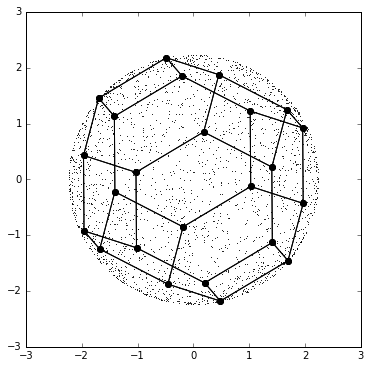

In [152]:
for e in E:
   # print e
    x = np.dot(e,A[:,:2])
    #print x
    plt.plot( x[:,0], x[:,1], 'k-')
    plt.plot( x[:,0], x[:,1], 'ko')
    
plt.plot(v[:,0], v[:,1],'k.', markersize=1)
    
    
plt.axis("Equal")
plt.xlim([-3,3])
plt.ylim([-3,3])

(-3, 3)

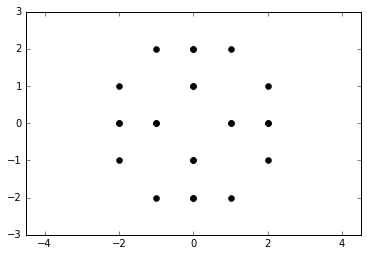

In [116]:
for v in np.dot(V,A[:,:2]):
    plt.plot(v[0], v[1], 'ko')
    
plt.axis("Equal")
plt.xlim([-3,3])
plt.ylim([-3,3])